# Выбор региона для разработки новых нефтяных месторождений

***Описание проекта:*** 

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

***Описание данных:***

- `id`— уникальный идентификатор скважины;
- `f0, f1, f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей).

***План работы над проектом:***

1. Загрузка и подготовка данных;
2. Обучение и проверка модели;
3. Подготовка к расчёту прибыли;
4. Расчёт прибыли и рисков;
5. Общий вывод;

## Загрузка и подготовка данных

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set(rc={'figure.figsize': (15, 15)})

Откроем и посмотрим на каждый набор данных.

In [9]:
def start(dataset):
        dataset.info()
        print('\n',dataset.describe())
        display(dataset.sample(5))
        print('Количество пропусков в таблице:\n')
        print(dataset.isna().sum(), '\n')
        print('Количество дубликатов в таблице:',  dataset.duplicated().sum())
        dataset.hist(figsize=(15, 15));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                   f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769 

,id,f0,f1,f2,product
13240,s5aFe,2.242501,0.290043,4.347522,122.507266
21606,Ubajj,0.222971,0.025354,0.065205,47.989030
50885,3XZwO,1.765642,0.098948,-3.546474,111.722416
10967,sX2r6,0.234305,-0.260871,0.619138,97.937841
16262,BmkRx,0.907090,-0.500607,5.155305,159.818949


Количество пропусков в таблице:

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

Количество дубликатов в таблице: 0


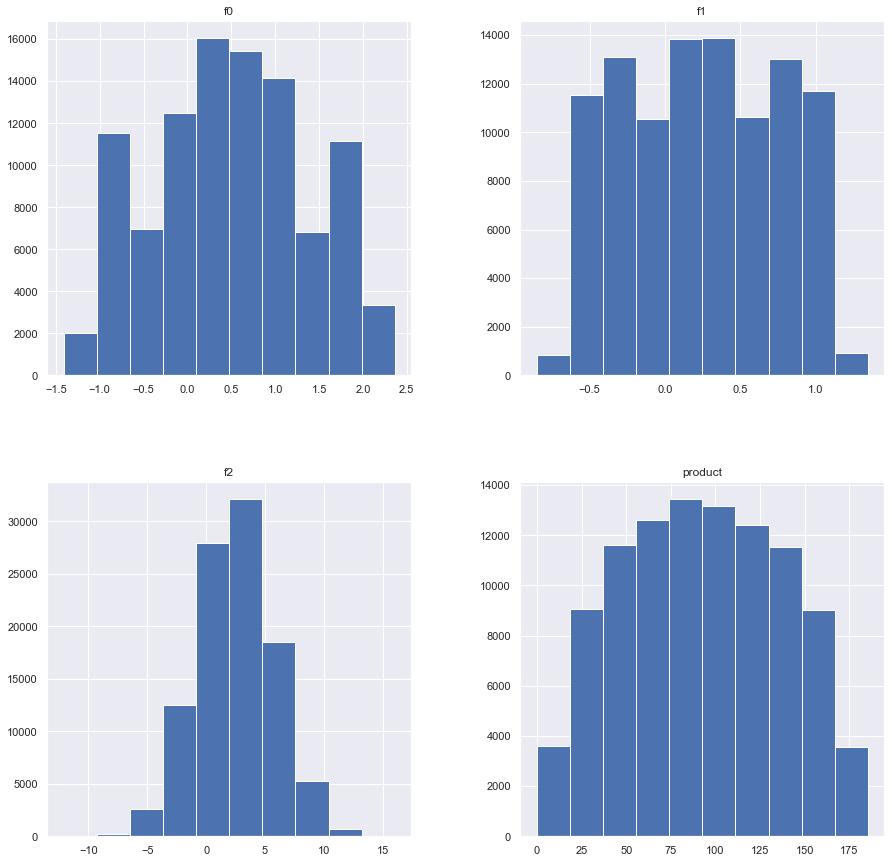

In [10]:
data_0 = pd.read_csv('geo_data_0.csv')
start(data_0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                   f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063 

,id,f0,f1,f2,product
49876,zOuWb,10.621545,-6.078470,2.003424,53.906522
55846,zrjHM,5.006331,-3.931121,1.990554,53.906522
11886,6iIAd,7.948137,3.614917,0.996088,26.953261
11063,gnOWA,14.827936,-7.472643,0.992863,26.953261
45950,GlITm,-10.780380,-8.633878,2.000123,57.085625


Количество пропусков в таблице:

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

Количество дубликатов в таблице: 0


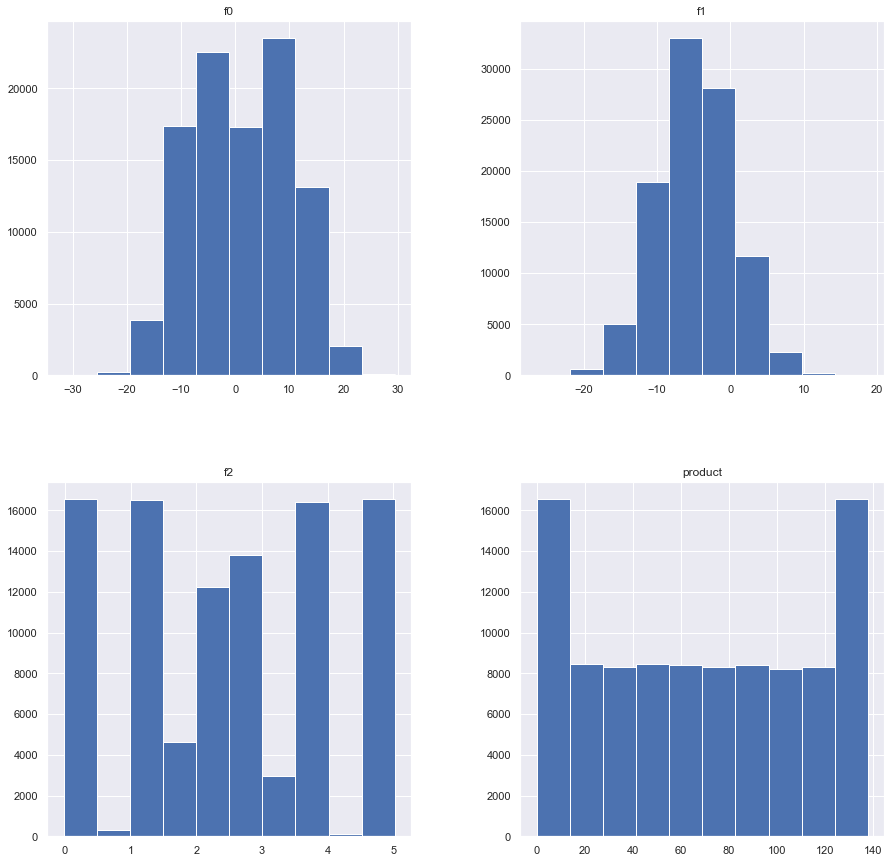

In [11]:
data_1 = pd.read_csv('geo_data_1.csv')
start(data_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                   f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801 

,id,f0,f1,f2,product
1436,FOhEc,-1.387721,2.206472,2.446250,151.174120
1301,opSod,-2.360750,0.484229,4.960596,46.940897
24158,uqOaH,1.163594,1.366075,0.903296,49.200687
73730,P8Cz8,-1.127728,-2.168892,9.458718,142.767619
23517,AY5GJ,0.550519,0.257191,3.038962,76.455735


Количество пропусков в таблице:

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

Количество дубликатов в таблице: 0


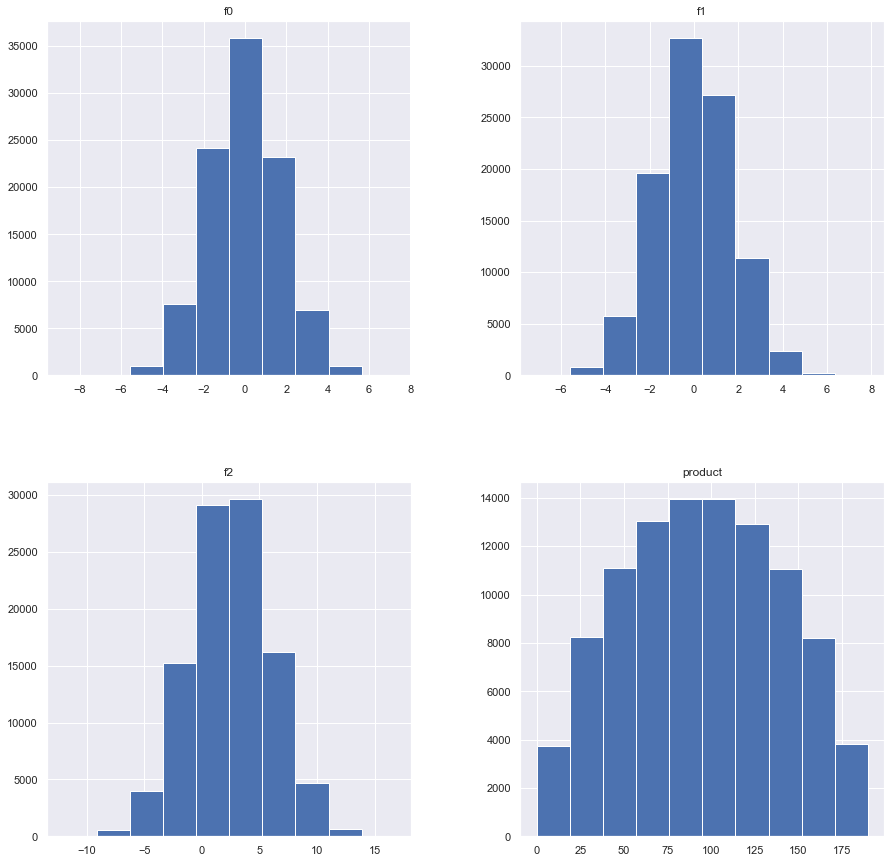

In [12]:
data_2 = pd.read_csv('geo_data_2.csv')
start(data_2)

Пропусков, дублей нет. Удалим столбец `id` из таблицы. Оне не нужен нам для обущения модели.

In [6]:
data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)
data_0.columns

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

Сделаем разбивку данных на обущающую(`75%`) и валидационную(`25%`) для каждого региона. (отношение 3 к 1) 

In [7]:
def split_data(dataset):
    features = dataset.drop('product', axis=1)
    target = dataset['product']

    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)

    return features_train, features_valid, target_train, target_valid

features_train_0, features_valid_0, target_train_0, target_valid_0 = split_data(data_0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(data_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(data_2)

print(features_train_1.shape)
print(target_valid_1.shape)

(75000, 3)
(25000,)


***Вывод:*** Мы подготовили данные для обучения модели. Что именно мы сделали:
- убедились в отсутствии пропусков и дубликатов в данных
- удалили столбец `id`, так как он не нужен для обудения модели
- сделали разбивку данных на обущающую(75%) и валидационную(25%) для каждого региона. (отношение 3 к 1).

## Обучение и проверка модели

Для каждого региона обучим модель линейной регрессии на обущающей выборке и высчитаем `RMSE` полученой модели и среднее предсказание.

In [8]:
def teach_model(features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    # создадим сразу таблицы с исходными данными и предсказанными, чтобы использовать bootstrap в дальнейшем
    data = {'product' : target_valid,
            'predicted_product' : predicted_valid}
    data_frame_bootstrap = pd.DataFrame(data, columns = ['product', 'predicted_product'])
    
    RMSE = (mean_squared_error(target_valid, predicted_valid) ** 0.5).round(2)
    
    return predicted_valid, RMSE, data_frame_bootstrap

In [9]:
# модель первого района
predicted_valid_0, RMSE_0, data_frame_bootstrap_0 = teach_model(features_train_0, features_valid_0, target_train_0, target_valid_0)
predicted_valid_0_mean = predicted_valid_0.mean().round(2)
    
print('RMSE у модели обученой на данных первого района:', RMSE_0)
print('Среднее от предсказаний модели обученой на данных первого района:', predicted_valid_0_mean)

RMSE у модели обученой на данных первого района: 37.58
Среднее от предсказаний модели обученой на данных первого района: 92.59


In [10]:
# модель второго района
predicted_valid_1, RMSE_1, data_frame_bootstrap_1 = teach_model(features_train_1, features_valid_1, target_train_1, target_valid_1)
predicted_valid_1_mean = predicted_valid_1.mean().round(2)

print('RMSE у модели обученой на данных второго района:', RMSE_1)
print('Среднее от предсказаний модели обученой на данных первого района:', predicted_valid_1_mean)

RMSE у модели обученой на данных второго района: 0.89
Среднее от предсказаний модели обученой на данных первого района: 68.73


In [11]:
# модель третьего района
predicted_valid_2, RMSE_2, data_frame_bootstrap_2 = teach_model(features_train_2, features_valid_2, target_train_2, target_valid_2)
predicted_valid_2_mean = predicted_valid_2.mean().round(2)

print('RMSE у модели обученой на данных третьего района:', RMSE_2)
print('Среднее от предсказаний модели обученой на данных первого района:', predicted_valid_2_mean)

RMSE у модели обученой на данных третьего района: 40.03
Среднее от предсказаний модели обученой на данных первого района: 94.97


Составим таблицу из полученных данных.

In [12]:
result = pd.DataFrame(
    [(predicted_valid_0_mean, predicted_valid_1_mean, predicted_valid_2_mean), (RMSE_0, RMSE_1, RMSE_2)], 
    index=['Среднее от предсказаний модели', 'RMSE'], 
    columns=['Район 1', 'Район 2', 'Район 3']
)
result

,Район 1,Район 2,Район 3
Среднее от предсказаний модели,92.59,68.73,94.97
RMSE,37.58,0.89,40.03


***Вывод:*** Для каждого региона обущили модель линейной регрессии на обущающей выборке и высчитали `RMSE` полученой модели и среднее предсказание. Как итог:
- первая и третья модель предсказывает средний объём в пределах `93`, в то же время вторая модель выдаёт среднее педсказание `69`
- погрешность первой и второй модели в райне `39`, что достаточно много с учётом размера среднего предсказания
- у второй модели погрешность меньше `1`. Это отличный результат. Связано это исходными данными районов. В столбще `product` значения очерь спецефично распеределены. Поэтому модель работает значительно лучше. Ниже простою гистограмму по второму(оранжевый цвет) и третьего района(синий цвет) по столбцу `product`.

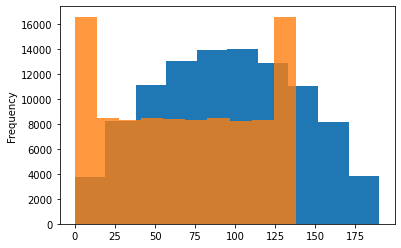

In [13]:
data_2['product'].plot.hist(bins=10);
data_1['product'].plot.hist(bins=10, alpha=0.8);

## Подготовка к расчёту прибыли

In [14]:
# средний объём нефти в регионах
product_0_mean = data_0['product'].mean()
product_1_mean = data_1['product'].mean()
product_2_mean = data_2['product'].mean()
print(product_0_mean, product_1_mean, product_2_mean)

92.50000000000001 68.82500000000002 95.00000000000004


In [15]:
# цена за баррель сырья
BARREL_PRICE = 450

# цена за единицу продукта (из столбца product)
PRODUCT_PRICE = 450000

# вероятность убытков. Выбирают регион с наибольшей средней прибылью.
LOSS_PROBABILITY = 2.5

# бюджет на разработку скважин в регионе
MONEY = 10_000_000_000

# при разведке региона исследуют 500 точек
DOTS = 500

# из которых с помощью машинного обучения выбирают 200 лучших для разработки
BEST_DOTS = 200

In [16]:
# найдём стоимость разработки одной скважины
price_make_one_dots = MONEY / BEST_DOTS
price_make_one_dots

50000000.0

In [17]:
# теперь найдём некую точку безубыточности. Сколько единиц продукта должно быть в скважине для того, чтобы разработка ушло в 0
breakeven_point = price_make_one_dots / PRODUCT_PRICE
breakeven_point

111.11111111111111

***Вывод:*** При подготовке данных для расчёта прибыли и рисков мы выявили, что для разработки одной скважины, необходимо вложить `50` миллионов рублей, а точка безубыточности будет в том случае, если в текущей скважине будет `не менее 111 единиц` продукта. Если сравнить со средним объёмом нефти по наши `3` регионам, то у каждого их них этот показатель меньше. Ближе всего первый и третий регион с `~93` единиыами продукта.

## Расчёт прибыли и рисков 

Напишем функцию, которая рассчитывает прибыль от полученного сырья.

In [18]:
def profit(predicted):
    predicted_sort = sorted(predicted, reverse=True)[:200]
    product_profit = sum(predicted_sort) * PRODUCT_PRICE - MONEY
    return product_profit

In [19]:
print('Потенциальная бОльшая прибыль с 1 участка:', round(profit(predicted_valid_0) / 10**9, 1), 'млрд.')
print('Потенциальная бОльшая прибыль с 2 участка:', round(profit(predicted_valid_1) / 10**9, 1), 'млрд.')
print('Потенциальная бОльшая прибыль с 3 участка:', round(profit(predicted_valid_2) / 10**9, 1), 'млрд.')

Потенциальная бОльшая прибыль с 1 участка: 4.0 млрд.
Потенциальная бОльшая прибыль с 2 участка: 2.5 млрд.
Потенциальная бОльшая прибыль с 3 участка: 3.3 млрд.


***Вывод:*** Мы написали формулу которая рассчитывает прибыль от полученного сырья. И проверив каждый участок на потенциальную бОльшую прибыль выявили, что самый большой доход из лучших `200` скважин можно получить если разрабатывать первый регион - `14 миллиардов`. Чистая прибыль `4 миллиарда`.

## Расчёт прибыли и рисков 

In [20]:
def bootstrap(df):
 
    values = []
    #negative_profit_count = 0

    state = np.random.RandomState(12345)
    for i in range(1000):
        df_subsample = df.sample(n=500, replace=True, random_state=state)
        df_subsample_200 = df_subsample.sort_values(by='predicted_product', ascending = False).head(200)
        values.append((sum(df_subsample_200['product']) * PRODUCT_PRICE) - MONEY)
        
    values = pd.Series(values)
    negative_profit_count = (values < 0).mean() * 100
    
#     for value in values:
#         if value < 0:
#             negative_profit_count += 1
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    return (values, lower, upper, negative_profit_count)

In [21]:
# Рассчёт первого участка
values, lower, upper, negative_profit_count = bootstrap(data_frame_bootstrap_0)
 
print('Ожидаемая средняя прибыль 200 скважин:',round(values.mean()/ 10**9, 2),'млрд.')
print('Нижняя граница 95%-го доверительного интервала:', round(lower/ 10**9, 2), 'млрд.')
print('Верхняя граница 95%-го доверительного интервала:', round(upper/ 10**9, 2), 'млрд.')
print('Риск потерь:', negative_profit_count, '%')

Ожидаемая средняя прибыль 200 скважин: 0.4 млрд.
Нижняя граница 95%-го доверительного интервала: -0.11 млрд.
Верхняя граница 95%-го доверительного интервала: 0.91 млрд.
Риск потерь: 6.9 %


In [22]:
# Рассчёт второго участка
values, lower, upper, negative_profit_count = bootstrap(data_frame_bootstrap_1)
 
print('Ожидаемая средняя прибыль 200 скважин:',round(values.mean()/ 10**9, 2),'млрд.')
print('Нижняя граница 95%-го доверительного интервала:', round(lower/ 10**9, 2), 'млрд.')
print('Верхняя граница 95%-го доверительного интервала:', round(upper/ 10**9, 2), 'млрд.')
print('Риск потерь:', negative_profit_count, '%')

Ожидаемая средняя прибыль 200 скважин: 0.46 млрд.
Нижняя граница 95%-го доверительного интервала: 0.03 млрд.
Верхняя граница 95%-го доверительного интервала: 0.85 млрд.
Риск потерь: 1.5 %


In [23]:
# Рассчёт третьего участка
values, lower, upper, negative_profit_count = bootstrap(data_frame_bootstrap_2)
 
print('Ожидаемая средняя прибыль 200 скважин:',round(values.mean()/ 10**9, 2),'млрд.')
print('Нижняя граница 95%-го доверительного интервала:', round(lower/ 10**9, 2), 'млрд.')
print('Верхняя граница 95%-го доверительного интервала:', round(upper/ 10**9, 2), 'млрд.')
print('Риск потерь:', negative_profit_count, '%')

Ожидаемая средняя прибыль 200 скважин: 0.4 млрд.
Нижняя граница 95%-го доверительного интервала: -0.16 млрд.
Верхняя граница 95%-го доверительного интервала: 0.95 млрд.
Риск потерь: 7.6 %


***Вывод:*** Мы проверили наши регионы на ожидаемую среднюю прибыль из `200` скважин, которые выбирали из `500` случайных скважин региона. И так `1000` раз. Самая большая прибыль у второго региона - `0.46 миллиарда`. И у него же самый низкий показатель риска - `1.5%`. Относительно конкурентных регионов у которых этот же показатель значительно больше `2.5%`, он самый подходящий для разработки. 

## Итоговый вывод

Целью нашего исследования было - решить, где бурить новую скважину. Для начала мы подготовили данные для обучения модели. Что именно мы сделали:
- убедились в отсутствии пропусков и дубликатов в данных
- удалили столбец `id`, так как он не нужен для обудения модели
- сделали разбивку данных на обущающую(`75%`) и валидационную(`25%`) для каждого региона. (отношение 3 к 1).

Для каждого региона мы обучили модель линейной регрессии на обучающей выборке и высчитали `RMSE` полученых моделей и среднее предсказание. Как итог:
- первая и третья модель предсказывает средний объём в пределах `93`, в то же время вторая модель выдаёт среднее педсказание `69`
- погрешность первой и второй модели в райне `39`, что достаточно много с учётом размера среднего предсказания
- у второй модели погрешность меньше `1`. Это отличный результат. Связано это исходными данными районов. В столбще `product` значения очерь спецефично распеределены. Поэтому модель работает значительно лучше. Ниже простою гистограмму по второму(оранжевый цвет) и третьего района(синий цвет) по столбцу `product`.

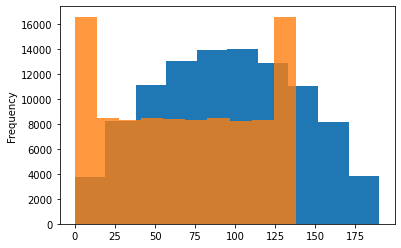

In [24]:
data_2['product'].plot.hist(bins=10);
data_1['product'].plot.hist(bins=10, alpha=0.8);

При подготовке данных для расчёта прибыли и рисков мы выявили, что для разработки одной скважины, необходимо вложить `50` миллионов рублей, а точка безубыточности будет в том случае, если в текущей скважине будет `не менее 111 единиц` продукта. Если сравнить со средним объёмом нефти по наши `3` регионам, то у каждого их них этот показатель меньше. Ближе всего первый и третий регион с `~93` единиыами продукта.


Затем мы написали формулу которая рассчитывает прибыль от полученного сырья. И проверив каждый участок на потенциальную бОльшую прибыль выявили, что самый большой доход из лучших `200` скважин можно получить если разрабатывать первый регион - `14 миллиардов`. Чистая прибыль `4 миллиарда`.

Ну и в конце исследования мы проверили наши регионы на ожидаемую среднюю прибыль из `200` скважин, которые выбирали из `500` случайных скважин региона. И так `1000` раз. Самая большая прибыль у второго региона `0.46 миллиарда`. И у него же самый низкий показатель риска - `1.5%`. Относительно конкурентных регионов у которых этот же показатель *значительно* больше `2.5%`, он самый подходящий для разработки. Можно его рекомендовать.